# Pneumatic Effort

So we had a pneumatic profile, and some bag info (actuation for constant flow, and force for pressure).

Now we can plug this in the pneumatic profile and see what it means in terms of velocity and force.

In [1]:
import sys, io

In [2]:
import numpy as np

In [3]:
import scipy.interpolate

In [4]:
import matplotlib.figure

In [5]:
from IPython.core.display import Image, display, HTML

%matplotlib inline

In [6]:
nb_pts = 1000

In [7]:
ps = (1 - np.exp(-3*np.linspace(0, 1, nb_pts))) * 50 * 98.0665

Flow to speed

In [8]:
# Plug results from #69
flow_ts = [0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.43434343434343436, 0.4444444444444445, 0.4545454545454546, 0.4646464646464647, 0.4747474747474748, 0.48484848484848486, 0.494949494949495, 0.5050505050505051, 0.5151515151515152, 0.5252525252525253, 0.5353535353535354, 0.5454545454545455, 0.5555555555555556, 0.5656565656565657, 0.5757575757575758, 0.5858585858585859, 0.595959595959596, 0.6060606060606061, 0.6161616161616162, 0.6262626262626263, 0.6363636363636365, 0.6464646464646465, 0.6565656565656566, 0.6666666666666667, 0.6767676767676768, 0.686868686868687, 0.696969696969697, 0.7070707070707072, 0.7171717171717172, 0.7272727272727273, 0.7373737373737375, 0.7474747474747475, 0.7575757575757577, 0.7676767676767677, 0.7777777777777778, 0.787878787878788, 0.797979797979798, 0.8080808080808082, 0.8181818181818182, 0.8282828282828284, 0.8383838383838385, 0.8484848484848485, 0.8585858585858587, 0.8686868686868687, 0.8787878787878789, 0.888888888888889, 0.8989898989898991, 0.9090909090909092, 0.9191919191919192, 0.9292929292929294, 0.9393939393939394, 0.9494949494949496, 0.9595959595959597, 0.9696969696969697, 0.9797979797979799, 0.98989898989899, 1.0]
flow_vs = [2.8282828282828283, 2.8282828282828283, 2.8282828282828274, 2.8282828282828287, 2.8282828282828274, 2.82828282828283, 2.186147186147185, 1.818181818181819, 1.8181818181818163, 1.8181818181818163, 1.818181818181819, 1.5411255411255376, 1.414141414141415, 1.4141414141414206, 1.4141414141414095, 1.414141414141415, 1.414141414141415, 1.3314967860422369, 1.1570247933884346, 1.157024793388429, 1.157024793388429, 1.157024793388429, 1.157024793388429, 1.1570247933884235, 1.1570247933884346, 1.10468319559229, 1.0606060606060572, 1.0606060606060628, 1.0606060606060572, 1.0606060606060572, 1.0606060606060628, 1.0606060606060628, 1.0606060606060628, 1.0454545454545432, 0.795454545454547, 0.795454545454547, 0.795454545454536, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454536, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454547, 0.795454545454536, 0.795454545454547, 0.795454545454558, 0.795454545454536, 0.795454545454547, 0.795454545454547, 0.795454545454536, 0.795454545454558, 0.795454545454547, 0.795454545454536, 0.795454545454547, 0.795454545454558, 0.795454545454536, 0.795454545454536, 0.795454545454569, 0.795454545454536, 0.7706611570247897, 0.57851239669422, 0.57851239669422, 0.5785123966942091, 0.5785123966942091, 0.57851239669422, 0.5785123966942091, 0.57851239669422, 0.5785123966942091, 0.57851239669422, 0.5785123966942091, 0.5785123966942091, 0.57851239669422, 0.57851239669422, 0.57851239669422, 0.5785123966941981, 0.57851239669422, 0.57851239669422, 0.57851239669422, 0.5785123966942091, 0.5785123966942091, 0.57851239669422, 0.5785123966942091, 0.57851239669422, 0.5785123966942091, 0.57851239669422, 0.57851239669422, 0.5785123966942091, 0.5785123966942091, 0.57851239669422, 0.57851239669422, 0.5785123966942091]
bag_c = 0.7 * 1e-3 # actuation volume
bag_range = 10 * 1e-2 # 10 cm actuation range
# bag height/s @ normalized time
# so bag_c is achieved in 1s

In [9]:
IFR = 135 * 1e-3 / 60

We want to reach IFR meaning we need to actuate our capacity in TBD

In [10]:
t_inh = bag_c / IFR # L / (L/s)
t_inh

0.31111111111111106

In [11]:
ts = np.linspace(0, t_inh, nb_pts)

In [12]:
flow_tss = np.array(flow_ts[:-1]) * t_inh

In [13]:
flow_vss = np.array(flow_vs) * bag_range / t_inh  # m/s

In [14]:
vs = scipy.interpolate.interp1d(flow_tss, flow_vss, fill_value="extrapolate")(ts)

Forces...

TODO -- it depends on actuation also - plug time and bilinear interpolate

In [15]:
actuation_pressure_weight_samples = {
 0: { # "0% @ D=6.7cm": 
  20: 1.8,
  25: 2.2,
  30: 2.5,
  35: 3.2,
  40: 3.3,
 },
 0.5: {
  20: 4.0,
  #25: 2.2,
  30: 5.4,
  #35: 3.2,
  40: 6.8,
 },
 0.75: {
  20: 4.6,
  #25: 2.2,
  30: 6.3,
  #35: 3.2,
  40: 7.6,
 },
}

In [16]:
force_ps = [20, 30, 40]
force_ws = [4.6, 6.3, 7.6]
force_ps = np.array(force_ps) * 98.0665
force_fs = np.array(force_ws) * 9.80665
p2f = scipy.interpolate.interp1d(force_ps, force_fs, fill_value="extrapolate")
fs = p2f(ps)

In [17]:
powers = vs * fs

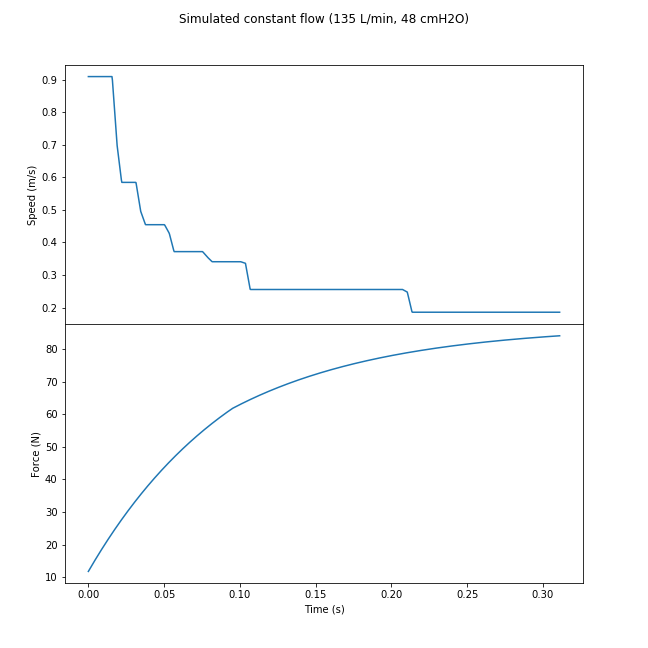

In [18]:
def fig_pf():
    subpcfg = matplotlib.figure.SubplotParams(
     left  =0.10,
     bottom=0.10,
     right =0.90,
     top   =0.90,
     wspace=0.00,
     hspace=0.00,
    )
    figure = matplotlib.figure.Figure(
     facecolor='white',
     edgecolor='white',
     subplotpars=subpcfg,
     figsize=(9,9),
    )

    axes = figure.add_subplot(2, 1, 1)
    axes.set_xlabel(("Time (s)"))
    axes.set_ylabel(("Speed (m/s)"))
    axes.plot(ts, vs)
    
    axes = figure.add_subplot(2, 1, 2)
    axes.set_xlabel(("Time (s)"))
    axes.set_ylabel(("Force (N)"))
    axes.plot(ts, fs)

    #axes = figure.add_subplot(3, 1, 3)
    #axes.set_xlabel(("Time (s)"))
    #axes.set_ylabel(("Power (W)"))
    #axes.plot(ts, powers)

    figure.suptitle(f"Simulated constant flow ({IFR*1000*60:.0f} L/min, {ps[-1]/98.0665:.0f} cmH2O)")
    
    return figure

fig = fig_pf()
canvasbase = matplotlib.backend_bases.FigureCanvasBase(fig)
figure_canvas = canvasbase._get_output_canvas("png")
f = io.BytesIO()
figure_canvas.print_png(f)
display(Image(data=f.getvalue(), format="png", embed=True))

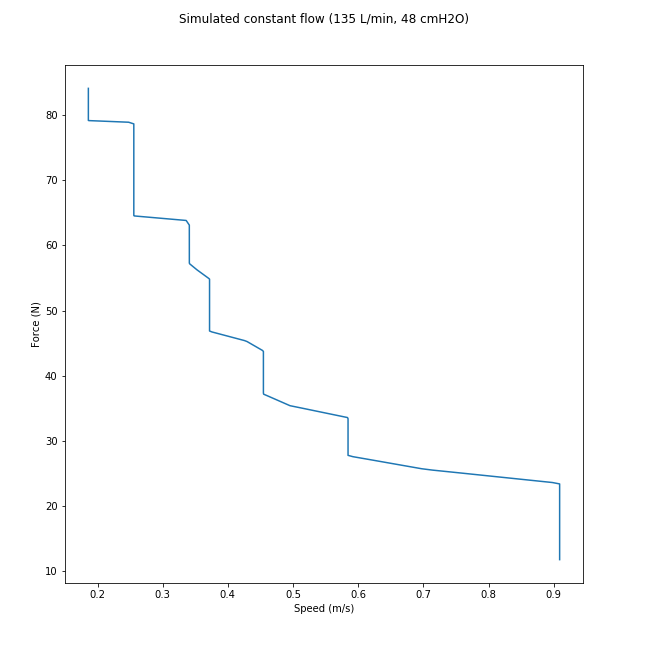

In [19]:
def fig_env():
    subpcfg = matplotlib.figure.SubplotParams(
     left  =0.10,
     bottom=0.10,
     right =0.90,
     top   =0.90,
     wspace=0.00,
     hspace=0.00,
    )
    figure = matplotlib.figure.Figure(
     facecolor='white',
     edgecolor='white',
     subplotpars=subpcfg,
     figsize=(9,9),
    )

    axes = figure.add_subplot(1, 1, 1)
    axes.set_xlabel(("Speed (m/s)"))
    axes.set_ylabel(("Force (N)"))
    axes.plot(vs, fs)

    figure.suptitle(f"Simulated constant flow ({IFR*1000*60:.0f} L/min, {ps[-1]/98.0665:.0f} cmH2O)")
    
    return figure

fig = fig_env()
canvasbase = matplotlib.backend_bases.FigureCanvasBase(fig)
figure_canvas = canvasbase._get_output_canvas("png")
f = io.BytesIO()
figure_canvas.print_png(f)
display(Image(data=f.getvalue(), format="png", embed=True))

Plugging a motion transform...

In [20]:
r = 20e-3 / 4
torques = fs * (r*100/2) # N * cm
speeds = vs / (np.pi * r) # m/s / (m/rot)

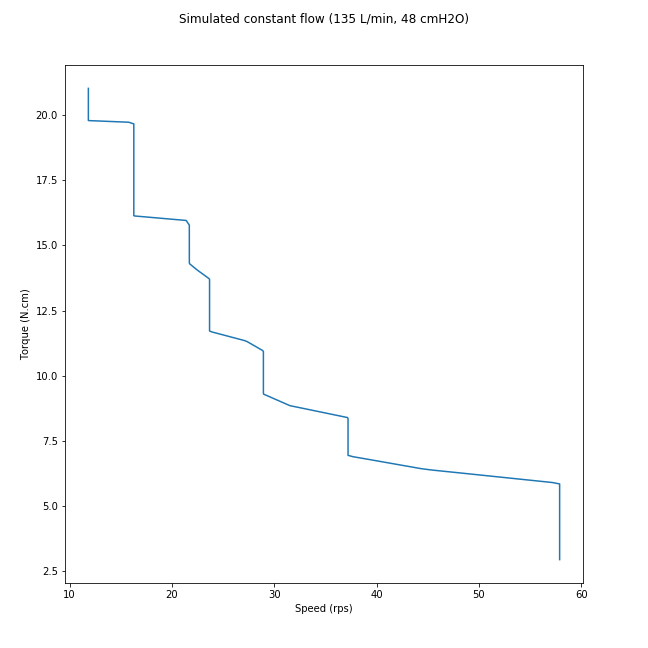

In [21]:
def fig_env():
    subpcfg = matplotlib.figure.SubplotParams(
     left  =0.10,
     bottom=0.10,
     right =0.90,
     top   =0.90,
     wspace=0.00,
     hspace=0.00,
    )
    figure = matplotlib.figure.Figure(
     facecolor='white',
     edgecolor='white',
     subplotpars=subpcfg,
     figsize=(9,9),
    )

    axes = figure.add_subplot(1, 1, 1)
    axes.set_xlabel(("Speed (rps)"))
    axes.set_ylabel(("Torque (N.cm)"))
    axes.plot(speeds, torques)

    figure.suptitle(f"Simulated constant flow ({IFR*1000*60:.0f} L/min, {ps[-1]/98.0665:.0f} cmH2O)")
    
    return figure

fig = fig_env()
canvasbase = matplotlib.backend_bases.FigureCanvasBase(fig)
figure_canvas = canvasbase._get_output_canvas("png")
f = io.BytesIO()
figure_canvas.print_png(f)
display(Image(data=f.getvalue(), format="png", embed=True))

TODO - take acceleration into account